<a href="https://colab.research.google.com/github/sosullivan7221/datasci_5_statistics/blob/main/wk5_datasci.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 5

## Packages

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency, ttest_ind
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

## Chi Square

This Chi-Square test will look to analyze if there is a correlation between a practice being considered a small practice (less than 15 billed physicians) and the practice being designated as a rural facility. The null hypothesis that there will be no correlation between the variables. The alternative hypothesis is that there will be a correlation between the two variables.

In [ ]:
df1 = pd.read_csv('/content/2021_puf_QPPAR-18260_small.csv')

contingency_table = pd.crosstab(df1['rural clinician'], df1['small practitioner'])
print(contingency_table)

<ipython-input-7-233a1d32f959>:1: DtypeWarning: Columns (1,3,6,7,11,12,13,14,15,16,17,18,19,23,26,27,29,31,33,35,37,39,41,43,45,48,49,50,51,52,53,55,57,59,61,63,65,76,77,78,80,82,84,87) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/content/2021_puf_QPPAR-18260_small.csv')


small practitioner  False  True 
rural clinician                 
False               29872   5263
True                 4186   1062


In [ ]:
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Chi2 value: {chi2}")
print(f"P-value: {p}")

Chi2 value: 95.12691520663529
P-value: 1.7856237057933652e-22


Analysis: Due to the Chi2 and P values, we would reject the null hypothesis here and accept our alternative hypothesis, meaning there is a significant correlation between small practices and rural practices. We see when looking at the values that there are close to 30,000 practices that are neither small facilities nor rural facilities, likely being the reasoning for the significant findings.

## T-Test

This T-test is to look at the relationship between facilities in the east and west halves of the United States in comparison to the number of medicare patients they see. The null hypothesis is that region will have no effect on number medicare patients. The alterantive hypothesis is that region will have an effect on the number of medicare patients.

In [ ]:
df4 = pd.read_csv('/content/2021_puf_QPPAR-18260_small.csv')

df4['region'] = df4['practice state or us territory'].apply(lambda x: 'west' if x in ['WA', 'OR', 'CA', 'NV', 'ID', 'MT', 'WY', 'UT', 'AZ', 'NM', 'CO', 'ND', 'SD', 'NE', 'KS', 'OK', 'TX', 'AK', 'HI'] else 'east')


<ipython-input-33-59b91b019e1d>:1: DtypeWarning: Columns (1,3,6,7,11,12,13,14,15,16,17,18,19,23,26,27,29,31,33,35,37,39,41,43,45,48,49,50,51,52,53,55,57,59,61,63,65,76,77,78,80,82,84,87) have mixed types. Specify dtype option on import or set low_memory=False.
  df4 = pd.read_csv('/content/2021_puf_QPPAR-18260_small.csv')


In [ ]:
western_data = df4[df4['region'] == 'west']['medicare patients']
eastern_data = df4[df4['region'] == 'east']['medicare patients']

western_data_clean = western_data.dropna()
eastern_data_clean = eastern_data.dropna()

t_stat, p_val = ttest_ind(western_data_clean, eastern_data_clean, equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

T-statistic: -13.07495432242527
P-value: 6.234443994484333e-39


In [ ]:
western_data_clean_mean = western_data_clean.mean()
eastern_data_clean_mean = eastern_data_clean.mean()

print(f"Mean prevalence for western states: {western_data_clean_mean}")
print(f"Mean prevalence for eastern states: {eastern_data_clean_mean}")

Mean prevalence for western states: 26836.430411052363
Mean prevalence for eastern states: 32972.36183131521


Analysis: The T statistic and P-value show that there is a significant relationship between number of medicare patients and region. Looking at the mean prevalence values, the states in the eastern region had around 2,000 more medicare patients per facility than states in the west. This is confirmed by the very small p value, which is less than .05.

## Anova

This Anova test to look at the relationship between the percentage of medicare users who used a telehealth service and both the quarter of the year in which the data was recorded and the geographic state of the practice. The null hypothesis is that these variables will have no effect on usage percentage of telehealth services. The alternative hypothesis is that these variables will have an effect on usage percentage of telehealth services.

In [ ]:
df3 = pd.read_csv('/content/TMEDTREND_PUBLIC_230821_small.csv')

model = ols('Pct_Telehealth ~ C(quarter) * C(Bene_Geo_Desc)', data=df3).fit()

anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                                sum_sq      df            F         PR(>F)
C(quarter)                   87.189228     3.0  8758.585484   0.000000e+00
C(Bene_Geo_Desc)             18.784025    55.0   102.924407   0.000000e+00
C(quarter):C(Bene_Geo_Desc)   5.820544   165.0    10.630949  2.972539e-208
Residual                     13.531777  4078.0          NaN            NaN


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 55, but rank is 51
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 165, but rank is 162
  warnings.warn('covariance of constraints does not have full '


In [ ]:
df3.groupby('quarter')['Pct_Telehealth'].mean()

quarter
1.0    0.072816
2.0    0.475124
3.0    0.295166
4.0    0.296333
Name: Pct_Telehealth, dtype: float64

In [ ]:
df3.groupby('Bene_Geo_Desc')['Pct_Telehealth'].mean()

Bene_Geo_Desc
Alabama                 0.225734
Alaska                  0.314518
Arizona                 0.324067
Arkansas                0.219401
California              0.387675
Colorado                0.292838
Connecticut             0.367074
Delaware                0.382203
District Of Columbia    0.364326
Florida                 0.277576
Georgia                 0.229700
Hawaii                  0.316753
Idaho                   0.211021
Illinois                0.282975
Indiana                 0.266799
Iowa                    0.226225
Kansas                  0.192814
Kentucky                0.275607
Louisiana               0.236267
Maine                   0.291238
Maryland                0.360580
Massachusetts           0.465038
Michigan                0.295955
Minnesota               0.355880
Missing Data                 NaN
Mississippi             0.226218
Missouri                0.215701
Montana                 0.191103
National                0.313209
Nebraska                0.180

Analysis: The results of this Anova test show a signficant relationship between our two variables of yearly quarter and state. This data is from 2020, and we can see why there would be a significant change based on quarter when looking at the data. The mean percent of telehealth usage significantly increased during quarter 2 (April-June), likely due to the COVID-19 pandemic and the increased utilization of teleheath after this time period.

## Regression

This regression test will look to analyze the relationship between staff COVID-19 rates and staff COVID-19 vaccination rates in nursing facilities. The null hypothesis is that there will be no relationship between these two variables. The alternative hypothesis is that there will be a relationship between these two variables.

In [ ]:
df2 = pd.read_csv('/content/covid_data_small_2021.csv')

df2 = df2[['Staff Total Confirmed COVID-19', 'Percentage of Current Healthcare Personnel who Received a Completed COVID-19 Vaccination at Any Time']]

df2_clean = df2.dropna()


<ipython-input-15-078145665b94>:1: DtypeWarning: Columns (0,1,2,3,4,5,8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('/content/covid_data_small_2021.csv')


In [ ]:
X = df2_clean['Percentage of Current Healthcare Personnel who Received a Completed COVID-19 Vaccination at Any Time']
y = df2_clean['Staff Total Confirmed COVID-19']

model = sm.OLS(y, X).fit()

print(model.summary())

                                       OLS Regression Results                                      
Dep. Variable:     Staff Total Confirmed COVID-19   R-squared (uncentered):                   0.673
Model:                                        OLS   Adj. R-squared (uncentered):              0.673
Method:                             Least Squares   F-statistic:                          6.002e+04
Date:                            Fri, 13 Oct 2023   Prob (F-statistic):                        0.00
Time:                                    19:38:57   Log-Likelihood:                     -1.4391e+05
No. Observations:                           29224   AIC:                                  2.878e+05
Df Residuals:                               29223   BIC:                                  2.878e+05
Df Model:                                       1                                                  
Covariance Type:                        nonrobust                                                  


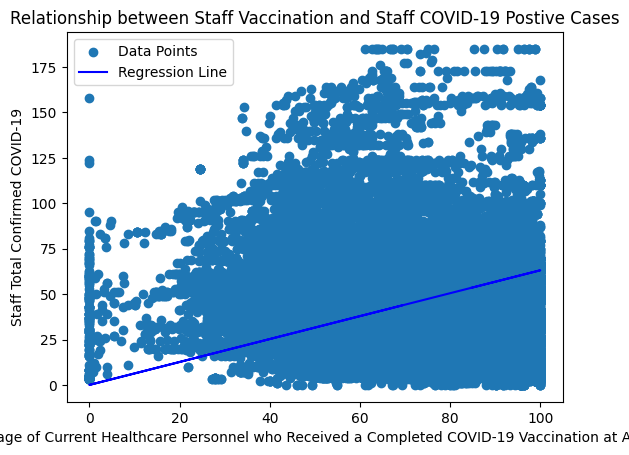

In [ ]:
plt.scatter(df2_clean['Percentage of Current Healthcare Personnel who Received a Completed COVID-19 Vaccination at Any Time'], df2_clean['Staff Total Confirmed COVID-19'], label='Data Points')
plt.plot(df2_clean['Percentage of Current Healthcare Personnel who Received a Completed COVID-19 Vaccination at Any Time'], model.predict(X), color='blue', label='Regression Line')
plt.xlabel('Percentage of Current Healthcare Personnel who Received a Completed COVID-19 Vaccination at Any Time')
plt.ylabel('Staff Total Confirmed COVID-19')
plt.title('Relationship between Staff Vaccination and Staff COVID-19 Postive Cases')
plt.legend()
plt.show()

Analysis: Looking at the graph, there seems to be a small positive correlation between the percentage of vaccinated staff and the amount of confirmed COVID-19 cases. While this is an unexpected result, as we would expect to find a negative correlation between these variables, there are two reasons that could explain it.

First, the total cases does not account for unique staff, so it is likely that a single staff member could have tested positive for covid multiple times within one year, while each staff member can only count one time towards vaccination status.

Second, the graph doesnt consider the time in which the cases occured and when the vaccination was received. The staff members could have received the vaccination after they had tested positive previously. Without the dates, it may show that the vaccination did not prevent the staff member from contracting covid, however the addition of time may give a more accurate insight into the effectiveness of the vaccination on positive cases.